In [36]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [2]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

In [3]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

In [30]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=11)
dt_clf = DecisionTreeClassifier(min_samples_split=4,random_state=11)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

In [31]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

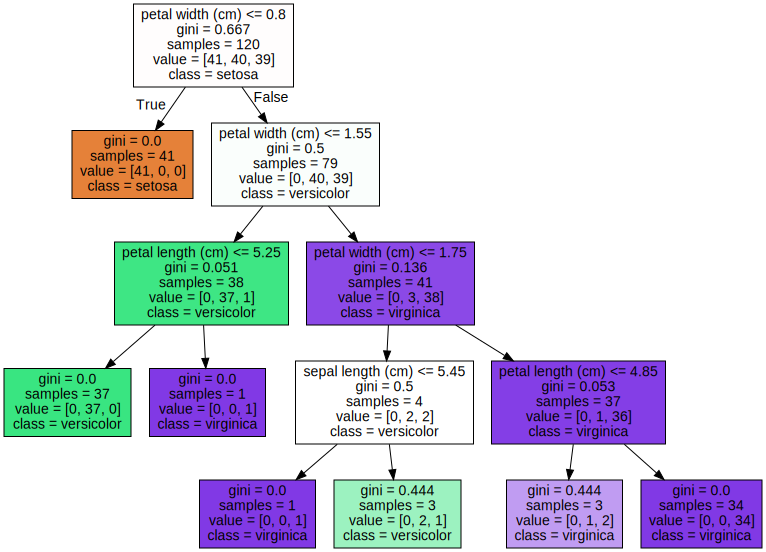

In [32]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature Importance:[0.009 0.    0.033 0.958]
sepal length (cm):0.009
sepal width (cm):0.000
petal length (cm):0.033
petal width (cm):0.958


<AxesSubplot:>

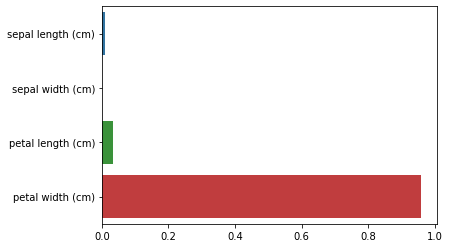

In [33]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature Importance:{0}'.format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

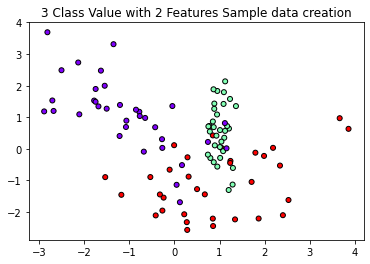

In [42]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class Value with 2 Features Sample data creation')
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                         n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')